# Magnetic Dipole Calculations
## Macrospin Approximation




In [4]:
# %matplotlib inline
%matplotlib notebook
%config InlineBackend.figure_format ='retina'
%run magsa_lib.py
%config IPCompleter.greedy=True

Initialise Parameters

In [5]:
r = 2.25e-9 # nm radius
d = 0.35e-9 # nm stacking distance
step = 10 # chirality -  degrees rotation


Bext = np.array([0,0,2]) # Applied Field
m_atom = 8.9 # atomic moment in µB
Bmag = np.linalg.norm(Bext)
T = 298 # K
m_curie = curie_moment(m_atom,Bmag,T)
NN = 1# number of monomers
param = {
    'r':r,
    'd':d,
    'step':10,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':90.0,
    'el':90.0,
    'NN':NN,
    'min':0,
}

param

{'r': 2.25e-09,
 'd': 3.5e-10,
 'step': 10,
 'm_atom': 8.9,
 'Bext': array([0, 0, 2]),
 'T': 298,
 'm_curie': 0.11903009247365273,
 'az': 90.0,
 'el': 90.0,
 'NN': 1,
 'min': 0}

Calculate the Magnetic Energy for a series of assemblies, output their lengths and energy. 

In [6]:
NK = 10
NN_List = np.floor(np.logspace(0,2,NK)).astype(int)
param = {
    'r':r,
    'd':d,
    'step':step,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':90.0,
    'el':90.0,
#     'az': np.random.uniform(0,180),
#     'el': np.random.uniform(0,180),
    'NN':1,
    'min':1,
}

for kk in range(NK):
    param['NN'] =  NN_List[kk]
    U,Bt,p = macro_calc(param)
    print('{0:0d} \t {1:0.2f} \t {2:0.3e}'.format(param['NN'], param['NN']*d*1e9, U/kB/T))
res = param
    
del res['Bext']
res['Bm'] = np.linalg.norm(Bext)
res['L'] = res['NN']*d*1e9
res['Um'] = U/kB/res['T']
pd.DataFrame(res, index=[0])

1 	 0.35 	 -1.610e-03
1 	 0.35 	 -1.610e-03
2 	 0.70 	 -3.220e-03
4 	 1.40 	 -6.441e-03
7 	 2.45 	 -1.127e-02
12 	 4.20 	 -1.932e-02
21 	 7.35 	 -3.382e-02
35 	 12.25 	 -5.636e-02
59 	 20.65 	 -9.501e-02
100 	 35.00 	 -1.610e-01


,r,d,step,m_atom,T,m_curie,az,el,NN,min,result,Bm,L,Um
0,2.250000e-09,3.500000e-10,10,8.9,298,0.11903,90.0,90.0,100,1,NaN,2.0,35.0,-0.161035


## Calculate the groundstate for an assembly, and plot the magnetic moments and local dipolar fields at each atomic site.

### Bx

<IPython.core.display.Javascript object>


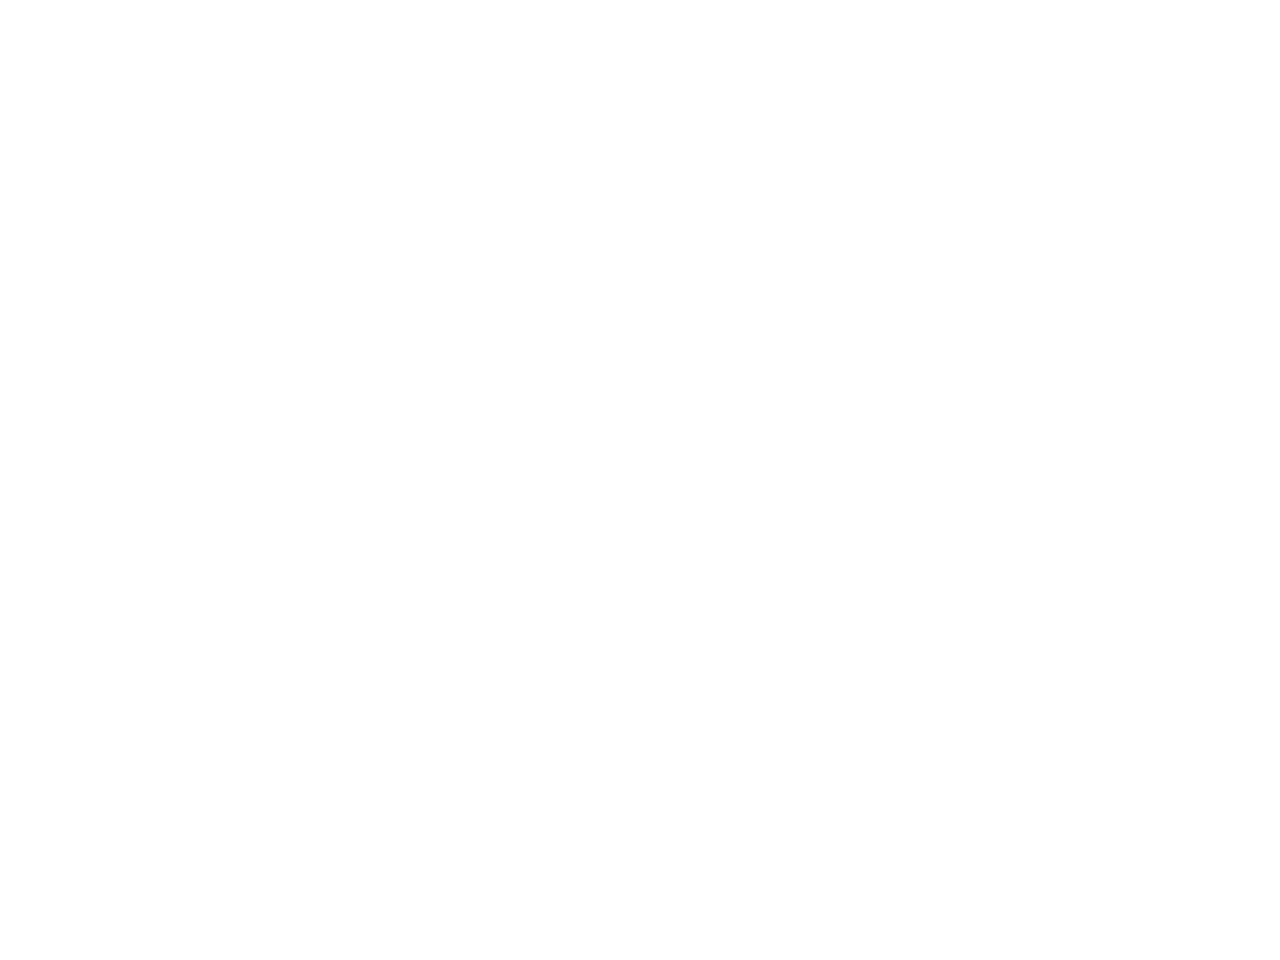

<IPython.core.display.Javascript object>


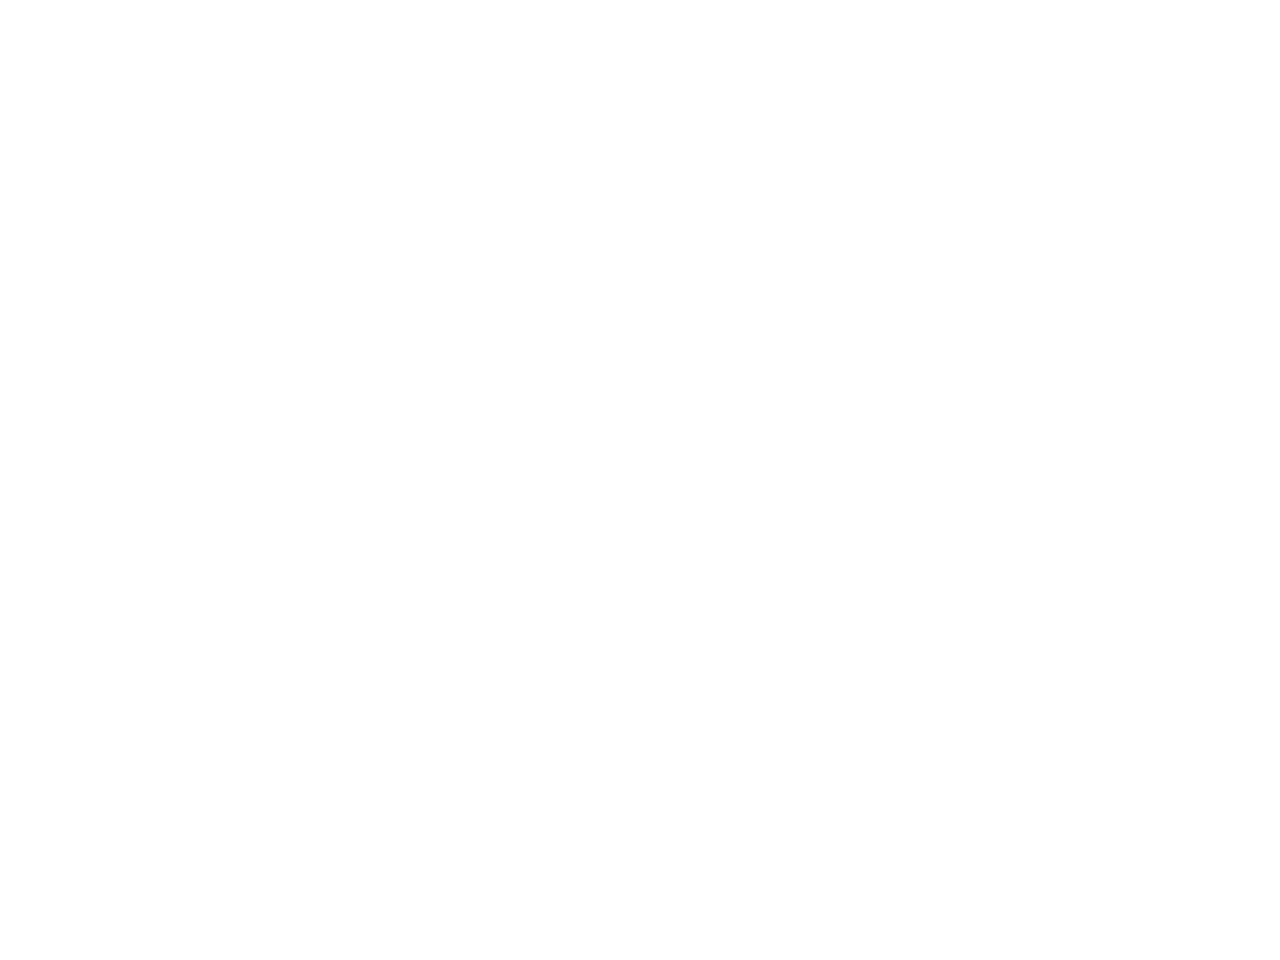

-19.94 J/mol/assem -1.00 J/mol/mono 20 monomers 7.00 nm


{'r': 2.25e-09,
 'd': 3.5e-10,
 'step': 10,
 'm_atom': 8.9,
 'Bext': array([1, 0, 0]),
 'T': 298,
 'm_curie': 0.059515046236826366,
 'az': 0.0,
 'el': 0.0,
 'NN': 20,
 'min': 1,
 'result':       fun: -3.5703905362836266
  hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
       jac: array([0., 0.])
   message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
      nfev: 3
       nit: 0
      njev: 1
    status: 0
   success: True
         x: array([0., 0.])}

In [7]:
Bext = np.array([1,0,0]) # Applied Field
NN = 20 
param = {
    'r':r,
    'd':d,
    'step':step,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':0.0,
    'el':0.0,
    'NN':NN,
    'min':1,
}
    
U,Bt,p = macro_calc(param)

SAV = 0
plt.close('all')
Bdip = (Bt - Bext)
Bn = Bdip/Bdip.max()
m = init_magn(p,param['m_curie'],param['az'],param['el'])

plot_res(p,m/muB,'quiver_Mx_20_macro',SAV);
plot_res(p,Bdip,'quiver_Bx_loc_20_macro',SAV)


U_mono = U/kB/T/NN
print('{0:0.2f} J/mol/assem {1:0.2f} J/mol/mono {2:0d} monomers {3:0.2f} nm'.format(
                                                            U*Na, U*Na/NN, NN, NN*d*1e9))
param

In [8]:
print(np.linalg.norm(Bt,axis=1))
print(np.linalg.norm(Bext))
print(np.linalg.norm(Bdip))

[1.00027972 0.99980155 0.9996741  1.00048293 0.99975942 0.99932972
 1.00038958 0.99998039 0.99918195 1.00020683 1.00021068 0.99913059
 0.9999741  1.00040299 0.99917081 0.99972343 1.00052977 0.99929512
 0.9994866  1.00057432 0.99948739 0.99929296 1.00053087 0.99972376
 0.99916635 1.00040483 0.99997539 0.99912225 1.00021169 1.0002119
 0.99916603 0.99997496 1.00040484 0.99929241 0.99972323 1.00053093
 0.99948602 0.99948682 1.00057476 0.99972321 0.99929432 1.00053078
 0.99997486 0.99916921 1.00040427 1.00020982 0.99912697 1.00021111
 1.00039843 0.9991732  0.99997647 1.00051462 0.99930317 0.99973412
 1.00052999 0.99950452 0.99953756 1.0002831  0.99978329 0.99968899]
1.0
7.745966692414834


In [9]:
B_az,B_el,Bm = cart2sph(Bdip[:,0], Bdip[:,1],Bdip[:,2])
B_az = np.rad2deg(B_az) % 360
B_el = np.rad2deg(B_el) % 360


<IPython.core.display.Javascript object>


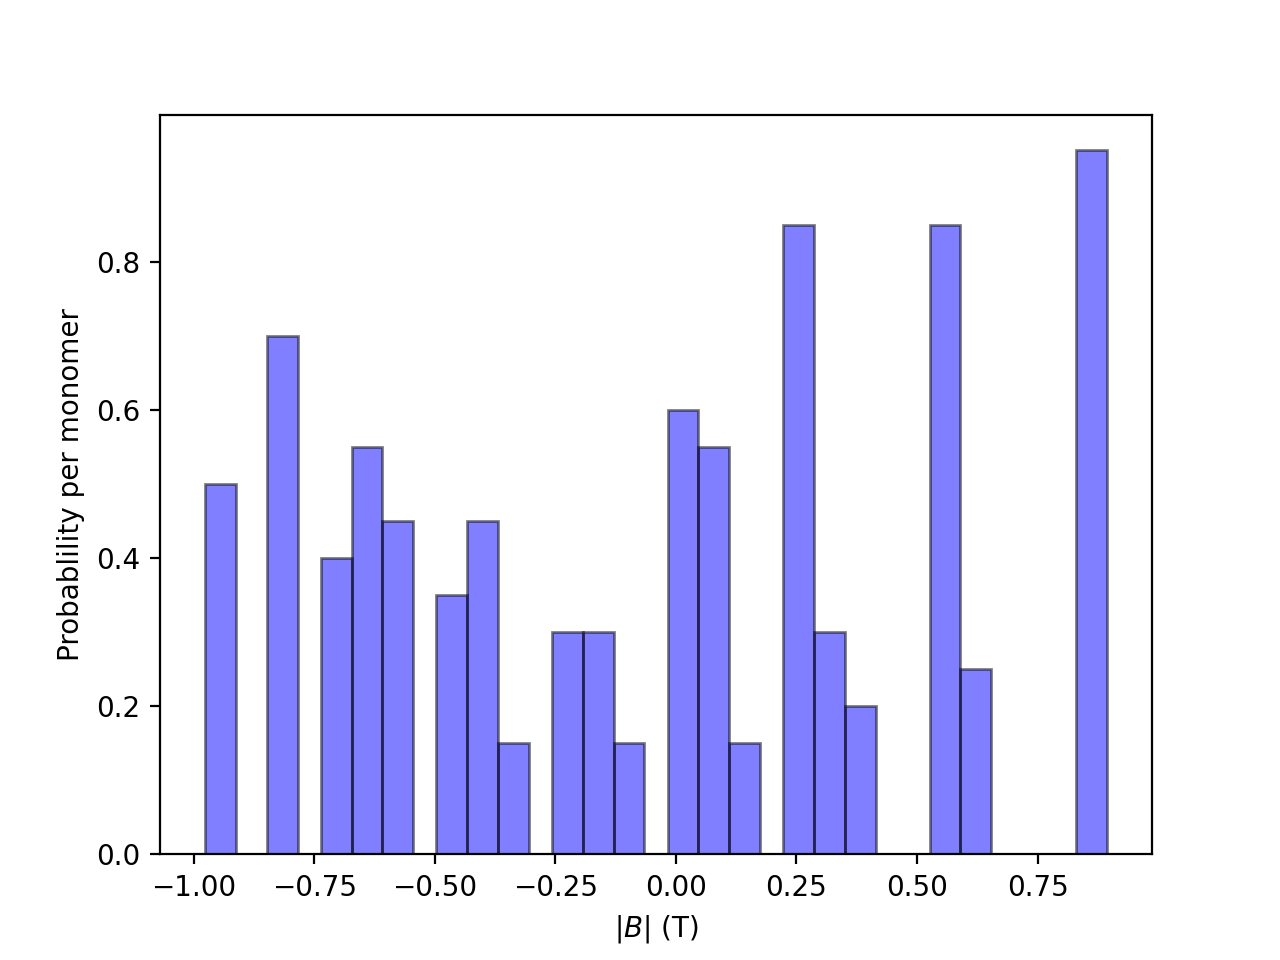

In [10]:
weights = np.ones_like(Bdip)/NN
num_bins = 8

plt.close('all')
fig = plt.figure()
plt.hist(Bdip,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$|B|$ (T)')
plt.ylabel('Probablility per monomer')
plt.show()

### By

<IPython.core.display.Javascript object>


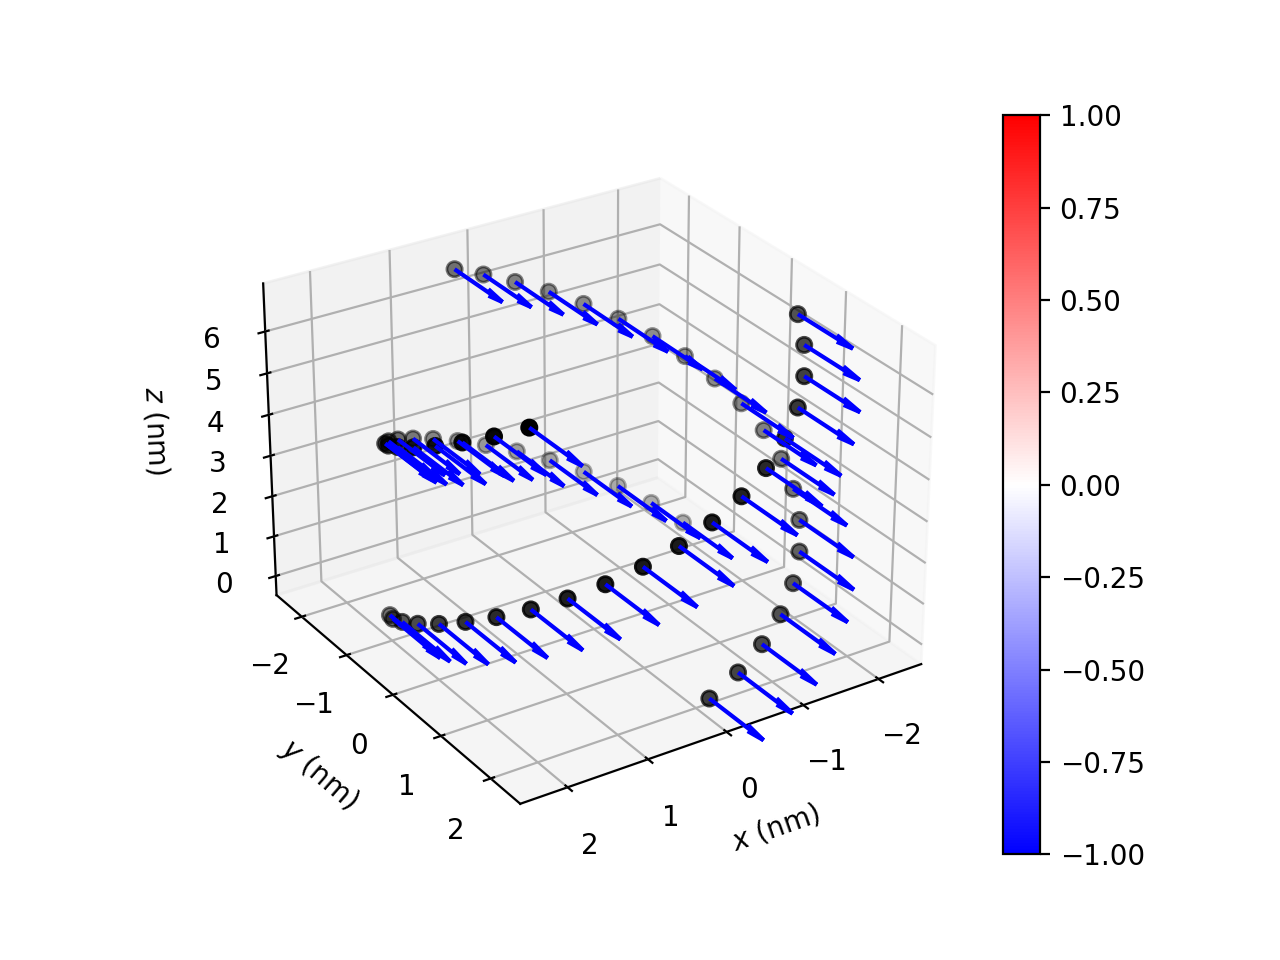

<IPython.core.display.Javascript object>


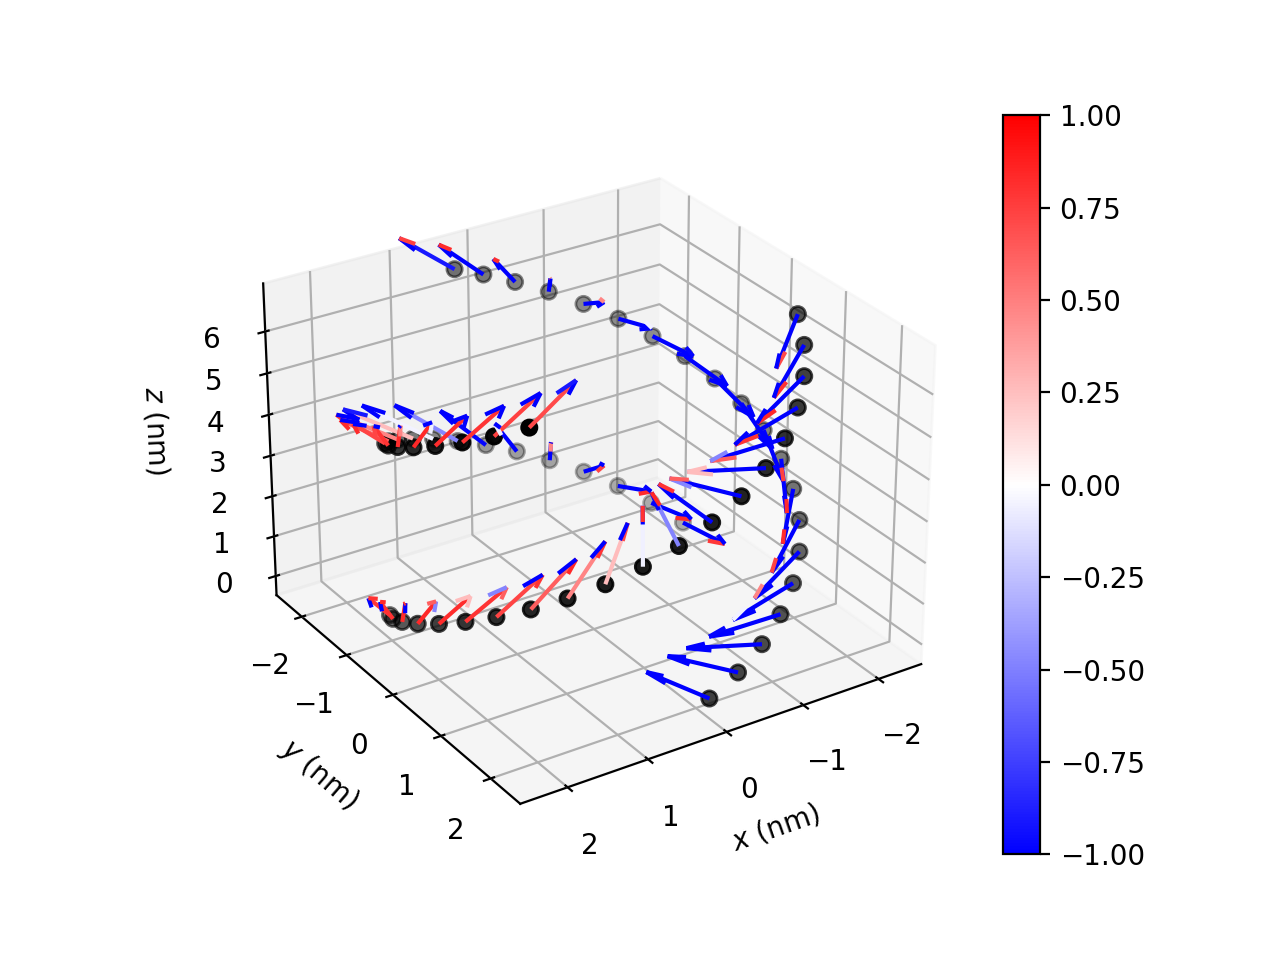

-19.94 J/mol/assem -1.00 J/mol/mono 20 monomers 7.00 nm


{'r': 2.25e-09,
 'd': 3.5e-10,
 'step': 10,
 'm_atom': 8.9,
 'Bext': array([0, 1, 0]),
 'T': 298,
 'm_curie': 0.059515046236826366,
 'az': 90.0,
 'el': 0.0,
 'NN': 20,
 'min': 1,
 'result':       fun: -3.570390536283628
  hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
       jac: array([4.44089489e-08, 1.77635684e-07])
   message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
      nfev: 3
       nit: 0
      njev: 1
    status: 0
   success: True
         x: array([90.,  0.])}

In [11]:
Bext = np.array([0,1,0]) # Applied Field
NN = 20 
param = {
    'r':r,
    'd':d,
    'step':step,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':90.0,
    'el':0.0,
    'NN':NN,
    'min':1,
}
    
U,Bt,p = macro_calc(param)

SAV = 0
plt.close('all')
Bdip = (Bt - Bext)
Bn = Bdip/Bdip.max()
m = init_magn(p,param['m_curie'],param['az'],param['el'])

plot_res(p,m/muB,'quiver_My_20_macro',SAV);
plot_res(p,Bdip,'quiver_By_loc_20_macro',SAV)



U_mono = U/kB/T/NN

N_min = np.ceil(-1.5/U_mono)
print('{0:0.2f} J/mol/assem {1:0.2f} J/mol/mono {2:0d} monomers {3:0.2f} nm'.format(
                                                            U*Na, U*Na/NN, NN, NN*d*1e9))
param

### Bz

<IPython.core.display.Javascript object>


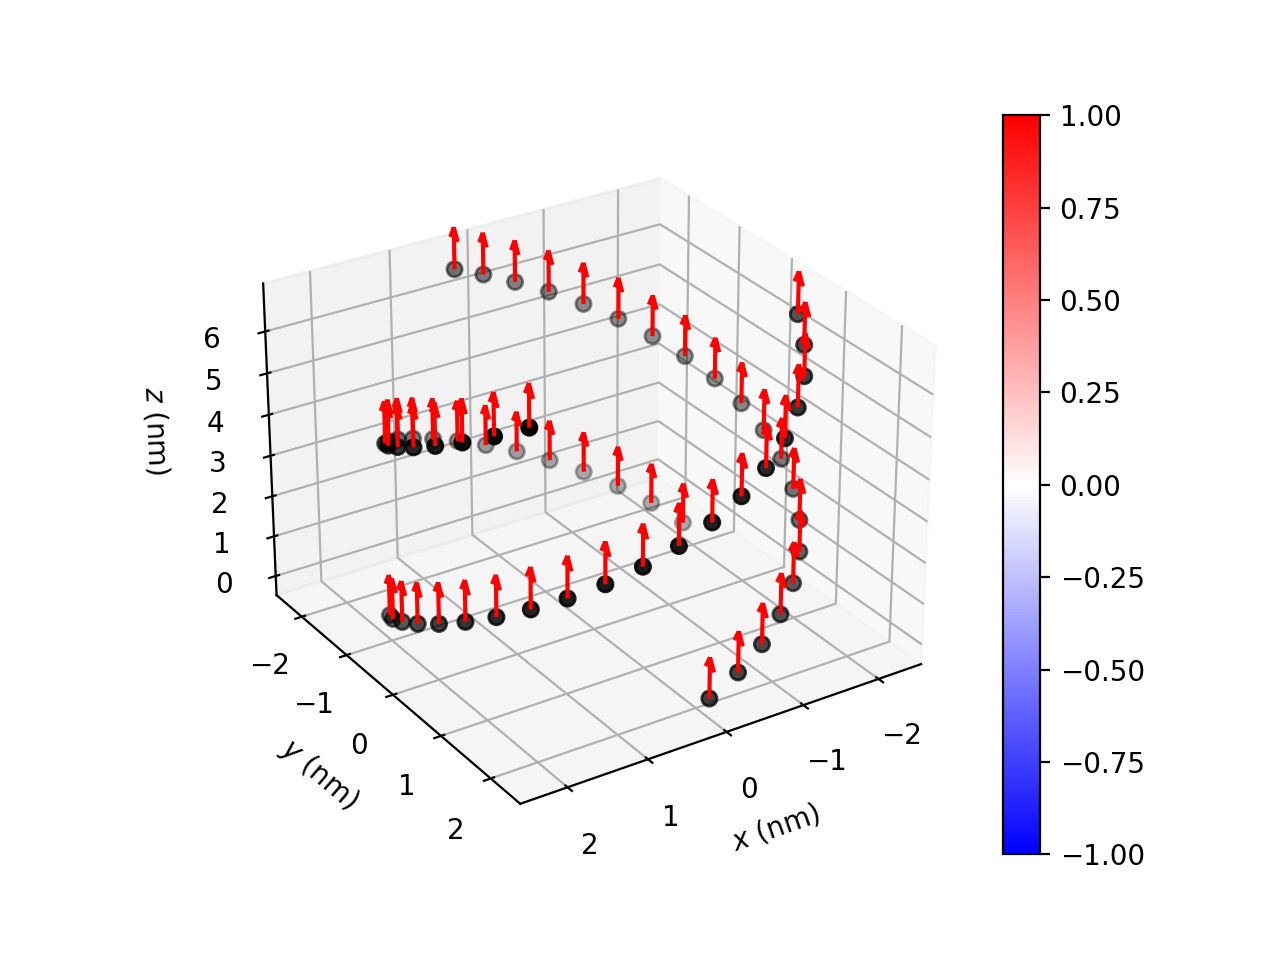

<IPython.core.display.Javascript object>


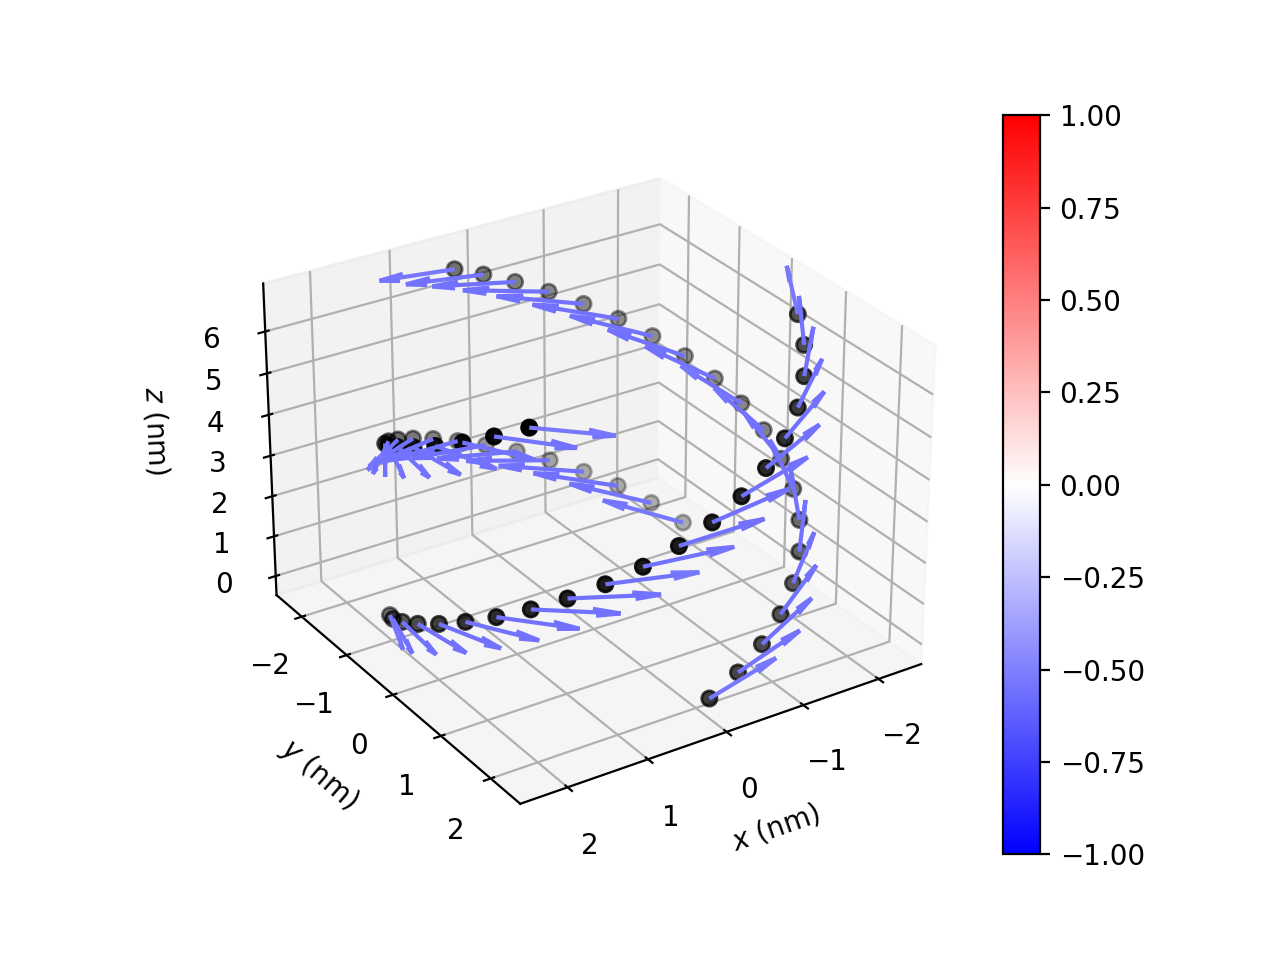

-79.80 J/mol/assem -3.99 J/mol/mono 20 monomers 7.00 nm


{'r': 2.25e-09,
 'd': 3.5e-10,
 'step': 10,
 'm_atom': 8.9,
 'Bext': array([0, 0, 2]),
 'T': 298,
 'm_curie': 0.11903009247365273,
 'az': 90.0,
 'el': 90.0,
 'NN': 20,
 'min': 1,
 'result':       fun: -14.287709000245963
  hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
       jac: array([ 0.00000000e+00, -7.10543182e-07])
   message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
      nfev: 3
       nit: 0
      njev: 1
    status: 0
   success: True
         x: array([90., 90.])}

In [12]:
Bext = np.array([0,0,2]) # Applied Field
NN = 20 
param = {
    'r':r,
    'd':d,
    'step':step,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':90.0,
    'el':90.0,
    'NN':NN,
    'min':1,
}
    
U,Bt,p = macro_calc(param)

SAV = 0
plt.close('all')
Bdip = (Bt - Bext)
Bn = Bdip/Bdip.max()
m = init_magn(p,param['m_curie'],param['az'],param['el'])

plot_res(p,m/muB,'quiver_Mz_20_macro',SAV);
plot_res(p,Bdip,'quiver_Bz_loc_20_macro',SAV)

U_mono = U/kB/T/NN

N_min = np.ceil(-1.5/U_mono)
print('{0:0.2f} J/mol/assem {1:0.2f} J/mol/mono {2:0d} monomers {3:0.2f} nm'.format(
                                                            U*Na, U*Na/NN, NN, NN*d*1e9))
param

## Plot the distribution of the orientation and intensity of the dipolar fields.

### Bx

<IPython.core.display.Javascript object>


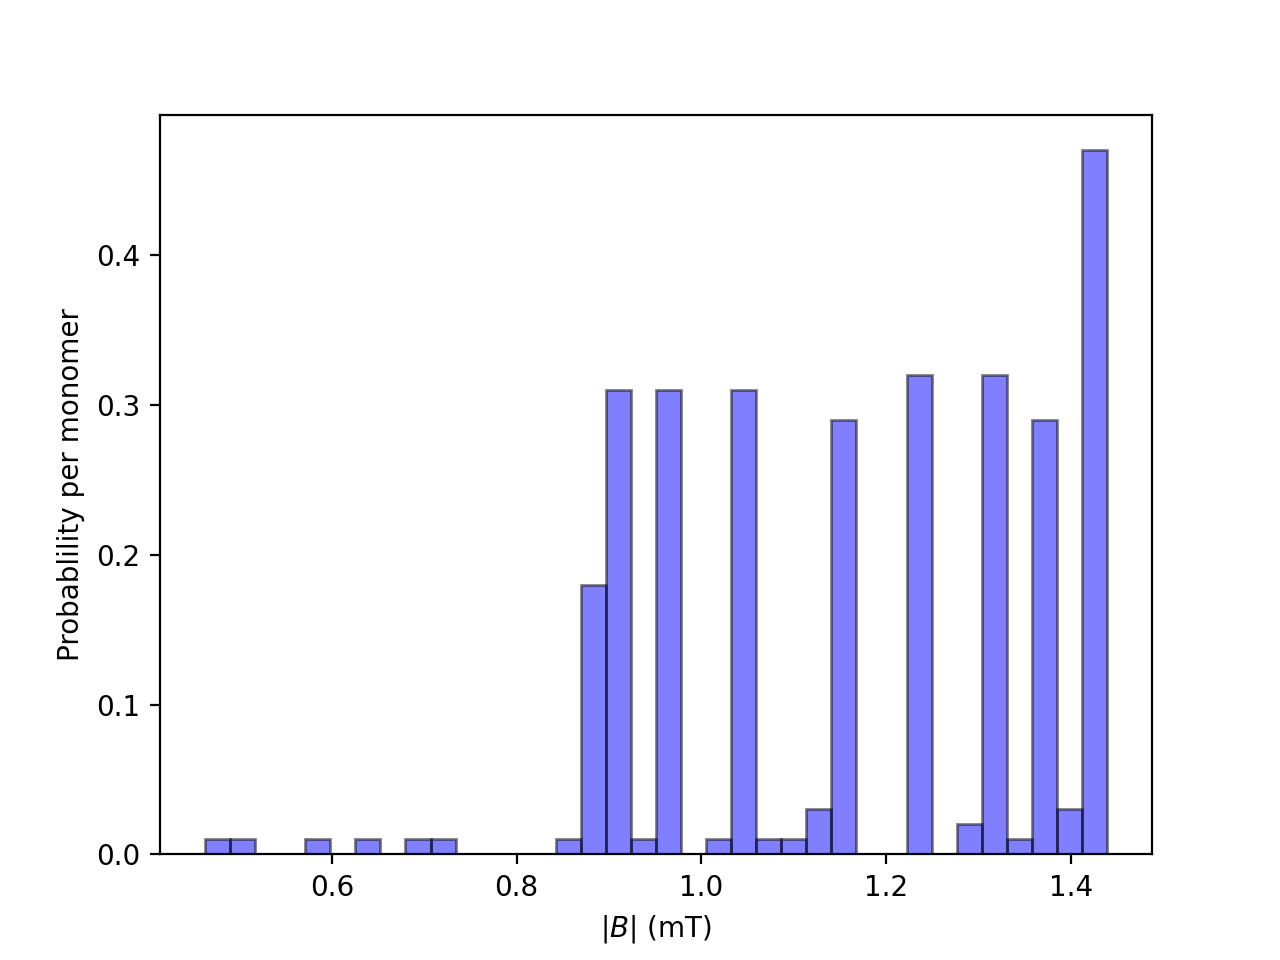

<IPython.core.display.Javascript object>


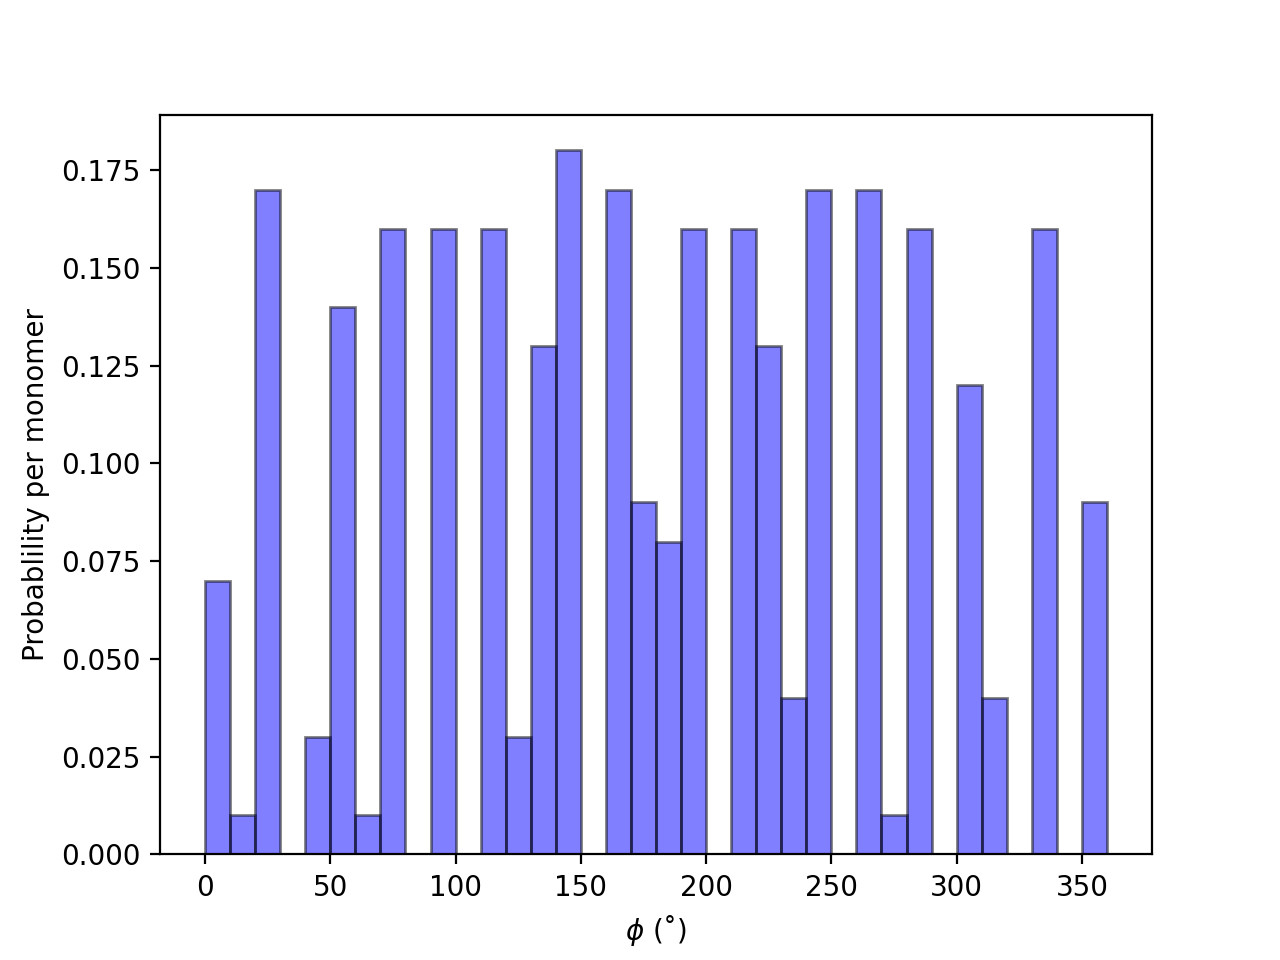

<IPython.core.display.Javascript object>


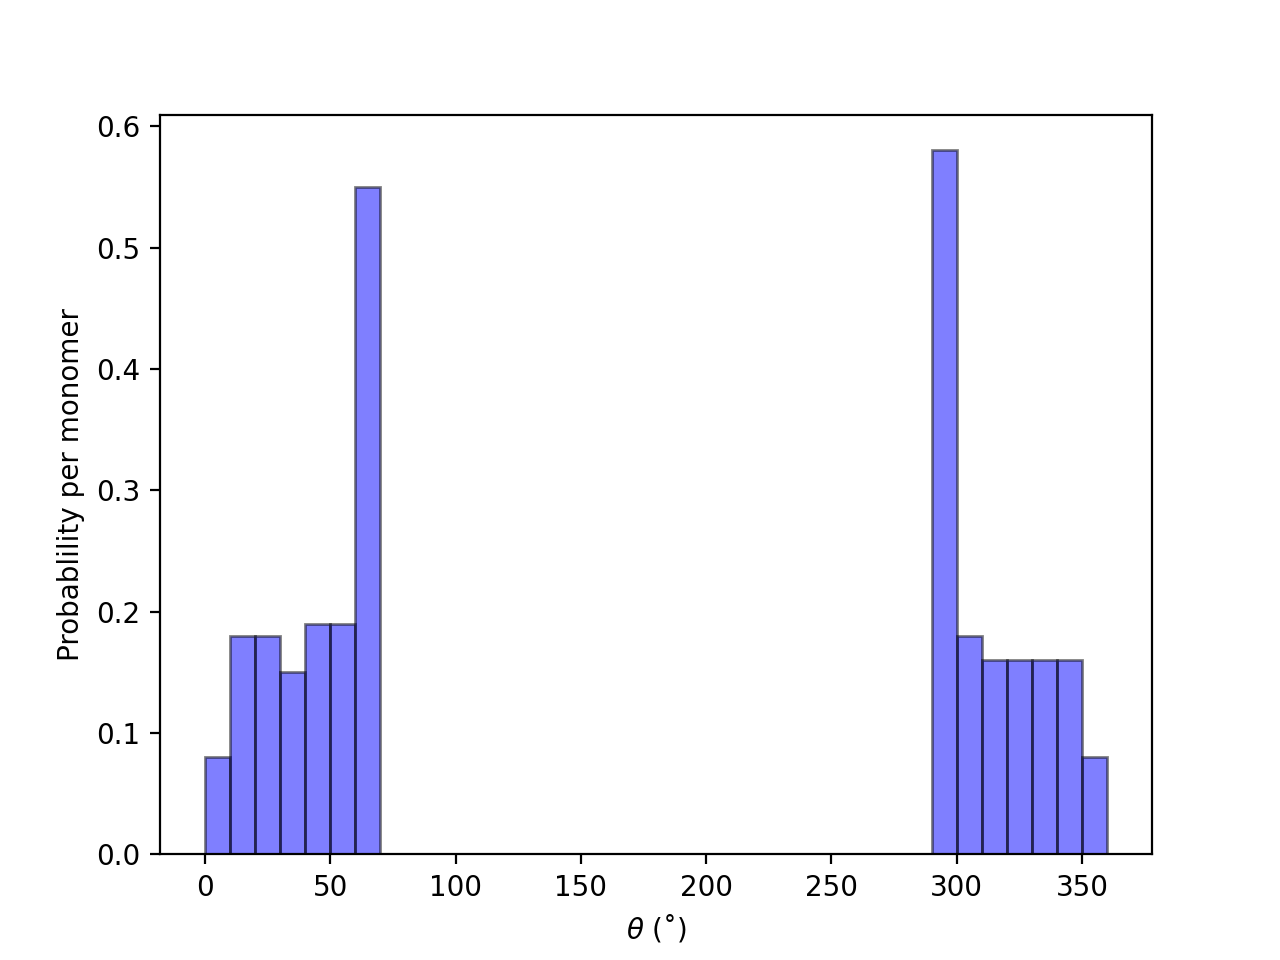

<IPython.core.display.Javascript object>


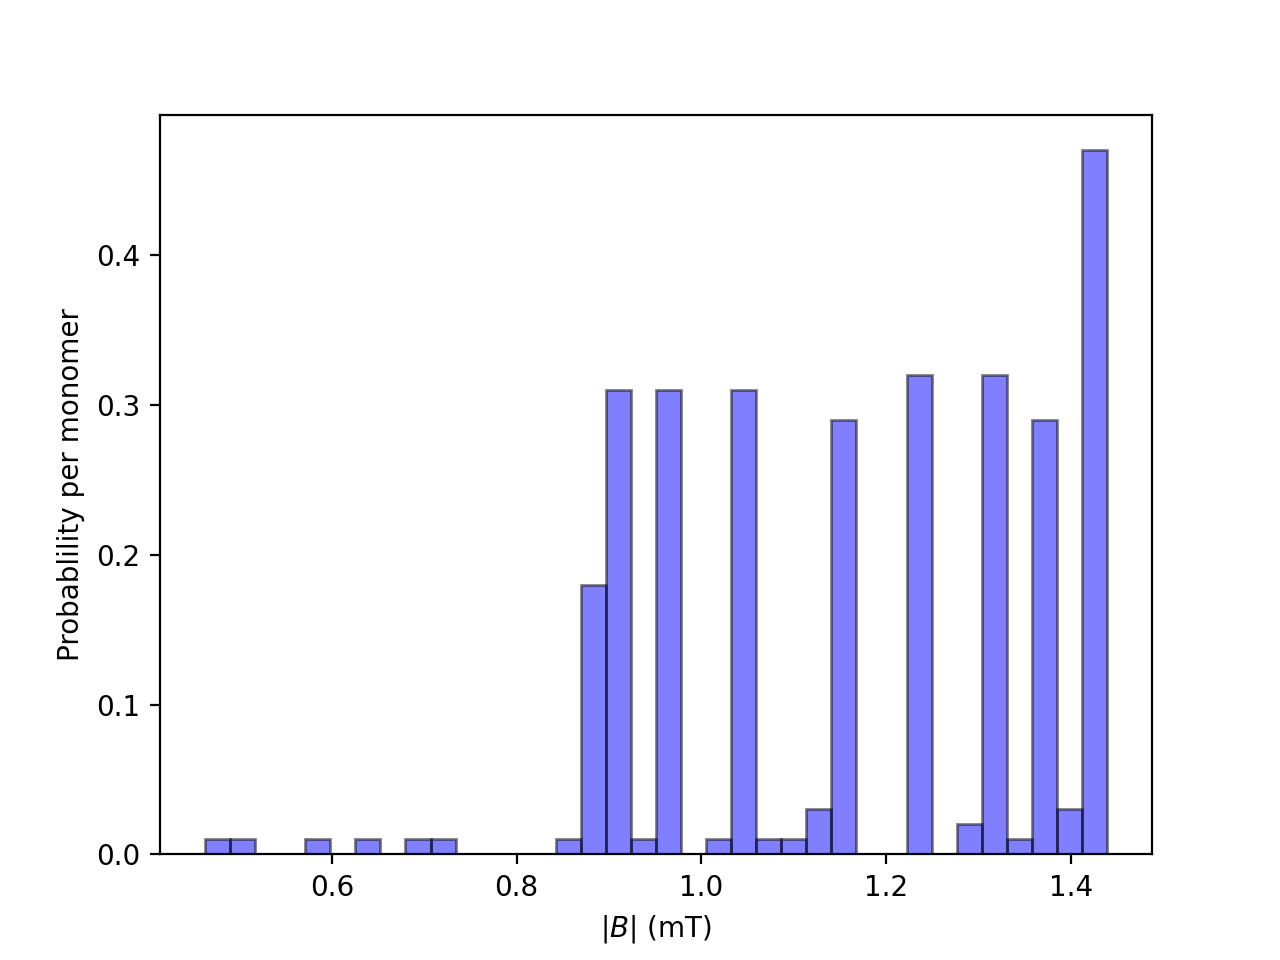

<IPython.core.display.Javascript object>


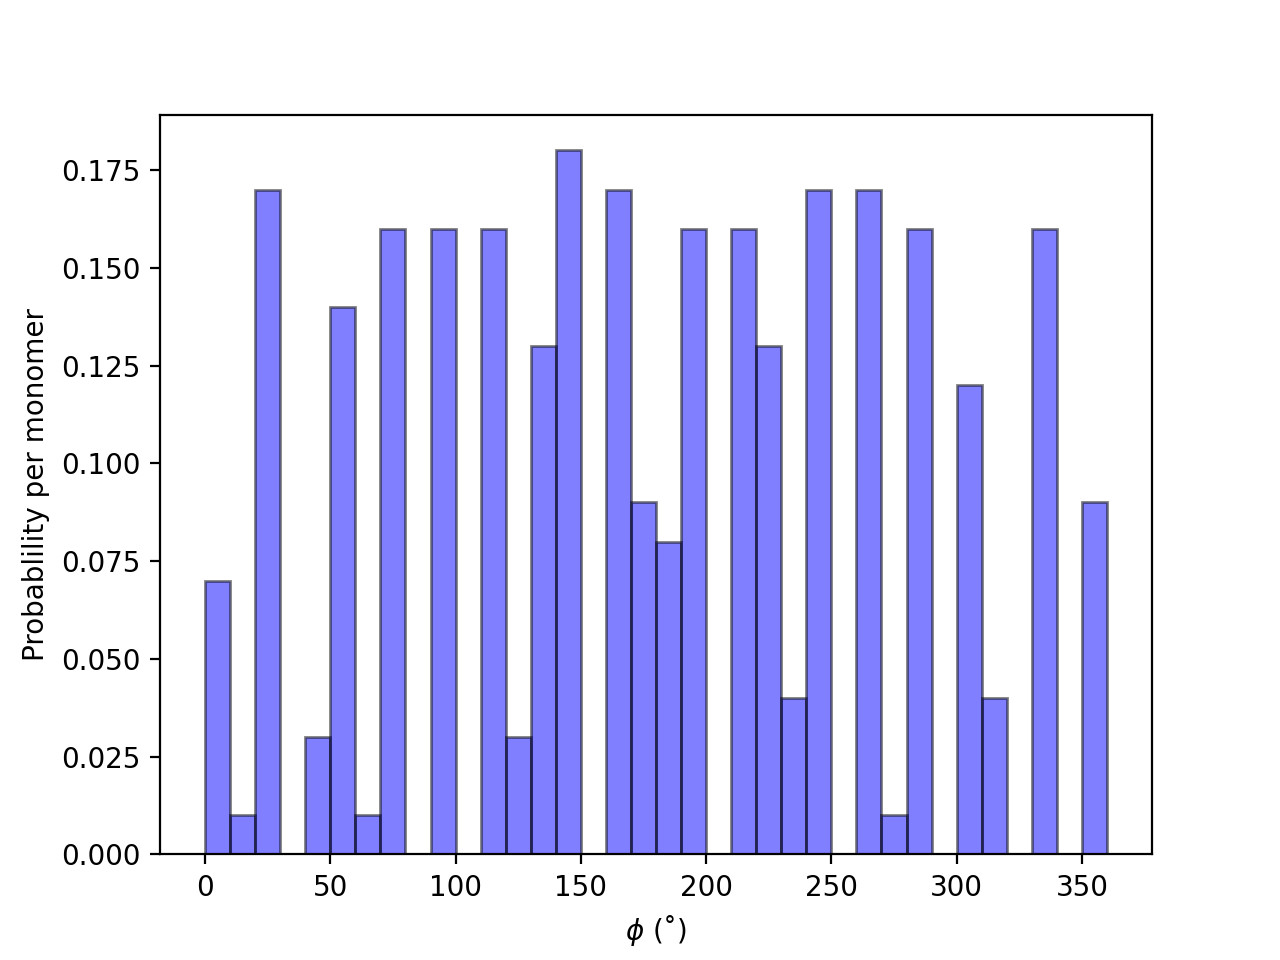

<IPython.core.display.Javascript object>


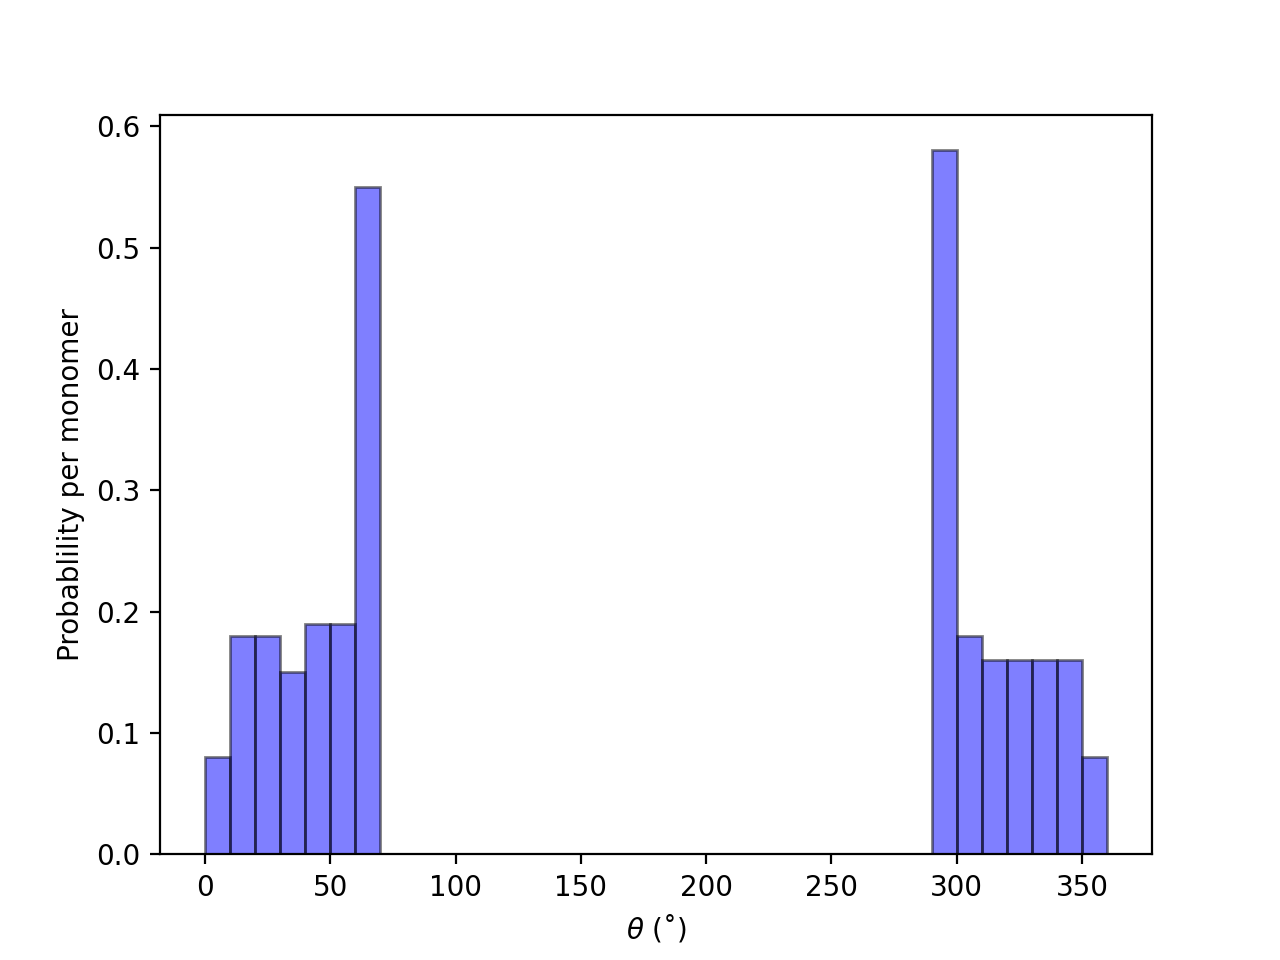

{'r': 2.25e-09,
 'd': 3.5e-10,
 'step': 10,
 'm_atom': 8.9,
 'Bext': array([1, 0, 0]),
 'T': 298,
 'm_curie': 0.059515046236826366,
 'az': 0.0,
 'el': 0.0,
 'NN': 100,
 'min': 1,
 'result':       fun: -17.851568073065522
  hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
       jac: array([ 0.00000000e+00, -3.55271368e-07])
   message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
      nfev: 3
       nit: 0
      njev: 1
    status: 0
   success: True
         x: array([0., 0.])}

In [13]:
Bext = np.array([1,0,0]) # Applied Field
NN = 100 
param = {
    'r':r,
    'd':d,
    'step':step,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':0.0,
    'el':0.0,
    'NN':NN,
    'min':1,
}
    
U,Bt,p = macro_calc(param)
Bdip = (Bt - Bext)

B_az,B_el,Bm = cart2sph(Bdip[:,0], Bdip[:,1],Bdip[:,2])
B_az = np.rad2deg(B_az) % 360
B_el = np.rad2deg(B_el) % 360


m = init_magn(p,curie_moment(m_atom,np.linalg.norm(Bt),T),param['az'],param['el'])

m0 = init_magn(p,param['m_curie'],param['az'],param['el'])


num_bins = 36
weights = np.ones_like(Bm)/NN

# w_m = 
SAV = 0

plt.close('all')
fig = plt.figure()
plt.hist(Bm*1e3,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$|B|$ (mT)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_Bm_x_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')

fig = plt.figure()
plt.hist(B_az,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\phi$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_azimuthal_x_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')


fig = plt.figure()
plt.hist(B_el,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\theta$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()

filenm = 'dist_elevation_x_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')

    
fig = plt.figure()
plt.hist(Bm*1e3,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$|B|$ (mT)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_Bm_x_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')

fig = plt.figure()
plt.hist(B_az,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\phi$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_azimuthal_x_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')


fig = plt.figure()
plt.hist(B_el,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\theta$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()

filenm = 'dist_elevation_x_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')
param

In [14]:
m = init_magn(p,curie_moment(m_atom,np.linalg.norm(Bt),T),param['az'],param['el'])

m0 = init_magn(p,param['m_curie'],param['az'],param['el'])

dm = (m-m0)*100/m0
dm2 = dm[np.isfinite(dm)]

<ipython-input-14-198189d283fc>:5: RuntimeWarning: invalid value encountered in true_divide
  dm = (m-m0)*100/m0


In [15]:
print(np.linalg.norm(Bt))
print(np.linalg.norm(Bext))

17.317662237919805
1.0


In [16]:
np.mean(dm2)

1631.7662237919803

<IPython.core.display.Javascript object>


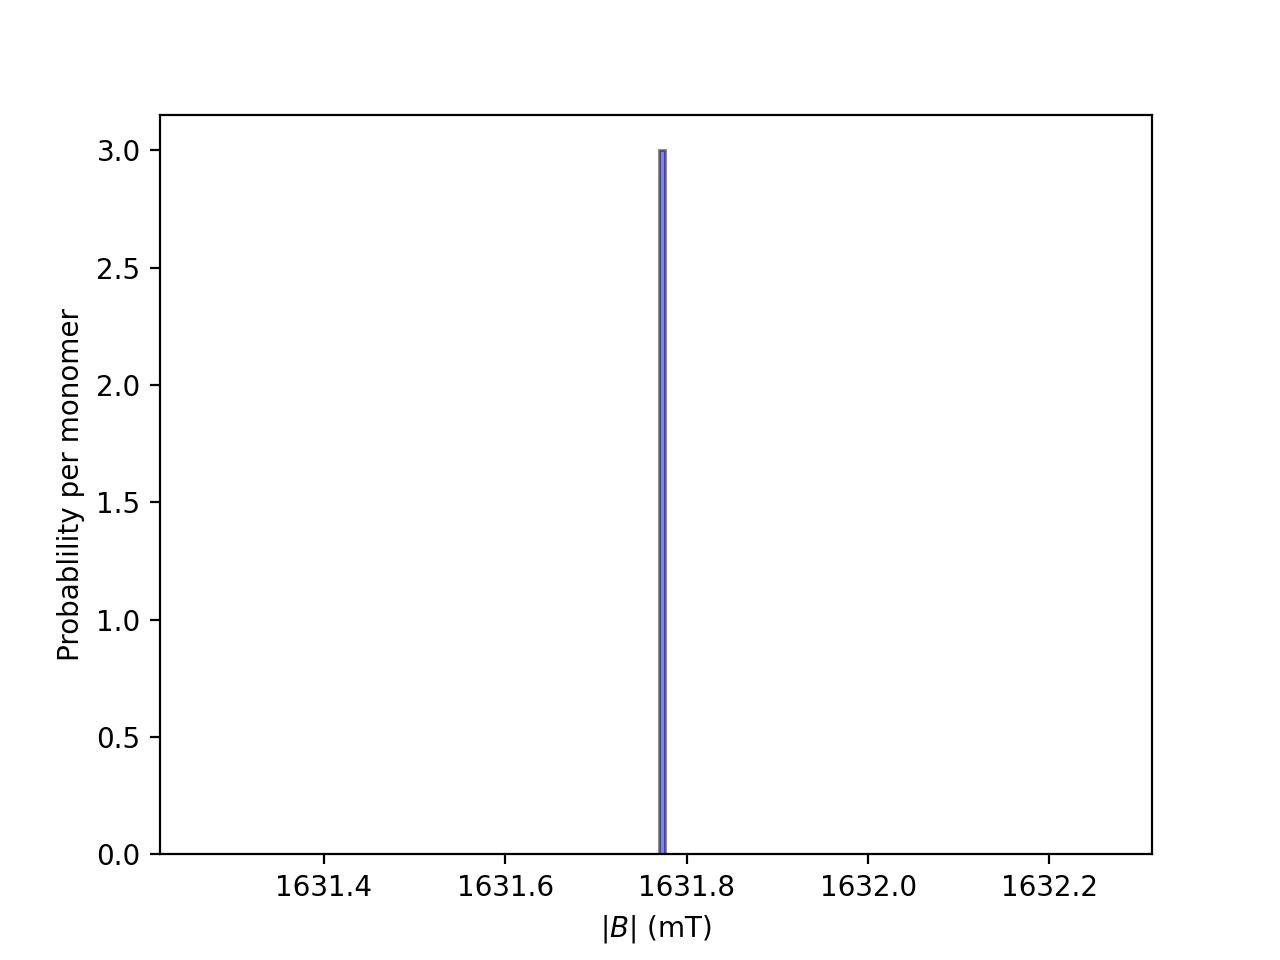

/Users/peter/opt/miniconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/peter/opt/miniconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


In [17]:
weights = np.ones_like(dm)/NN
plt.close('all')
fig = plt.figure()
plt.hist(dm,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$|B|$ (mT)')
plt.ylabel('Probablility per monomer')
plt.show()

### By

<IPython.core.display.Javascript object>


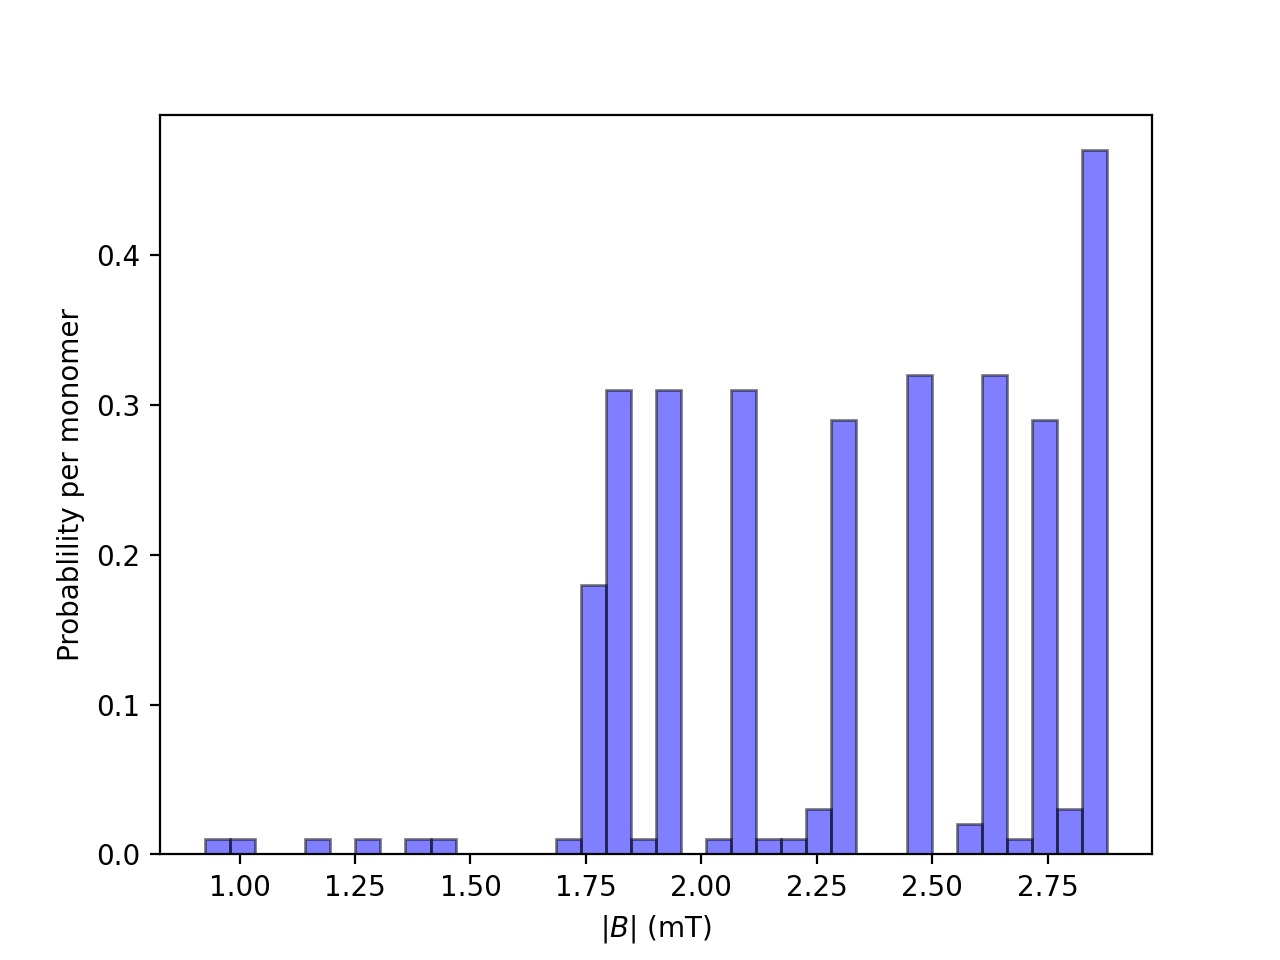

<IPython.core.display.Javascript object>


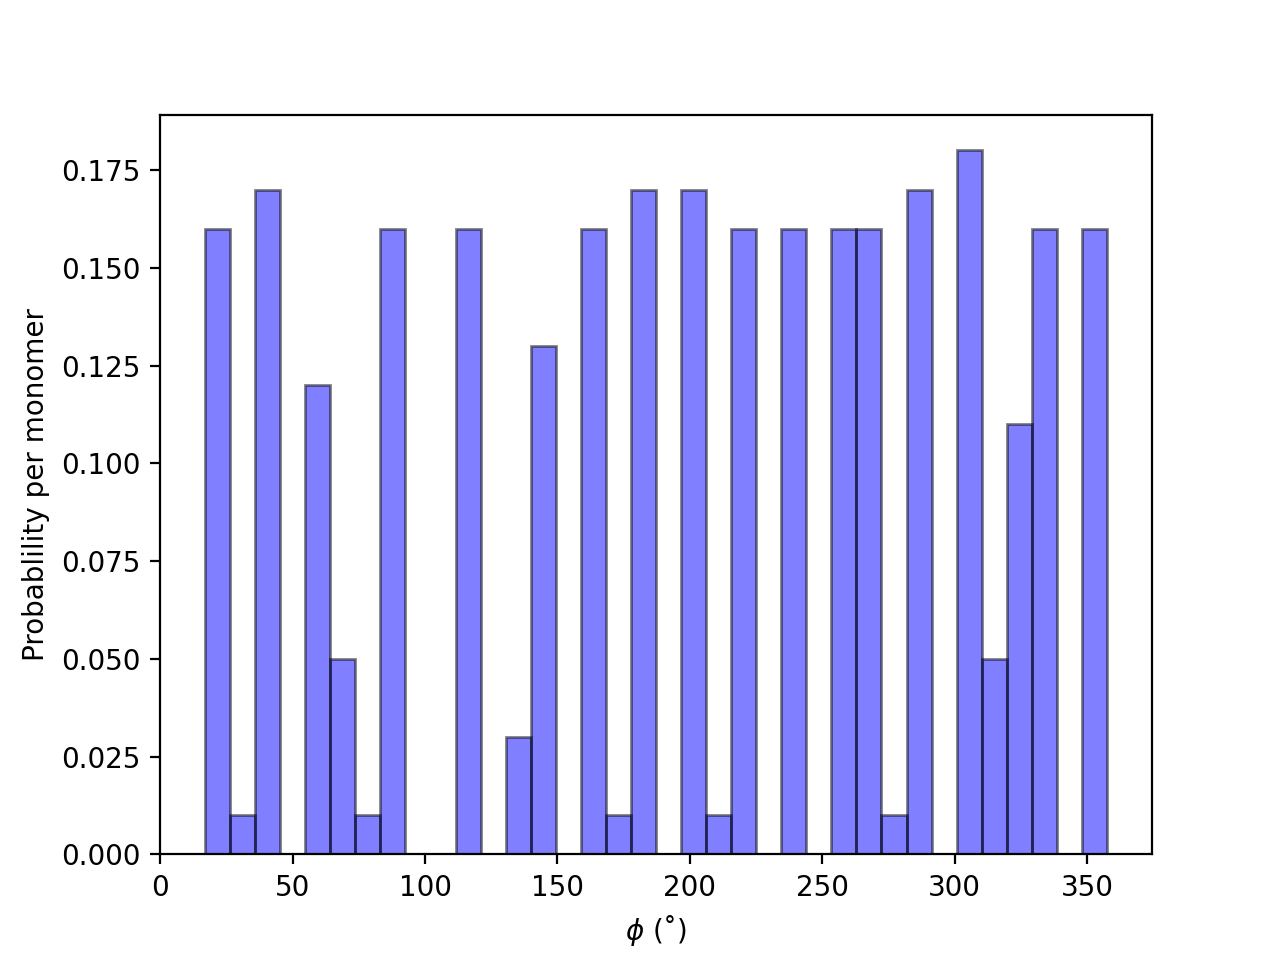

<IPython.core.display.Javascript object>


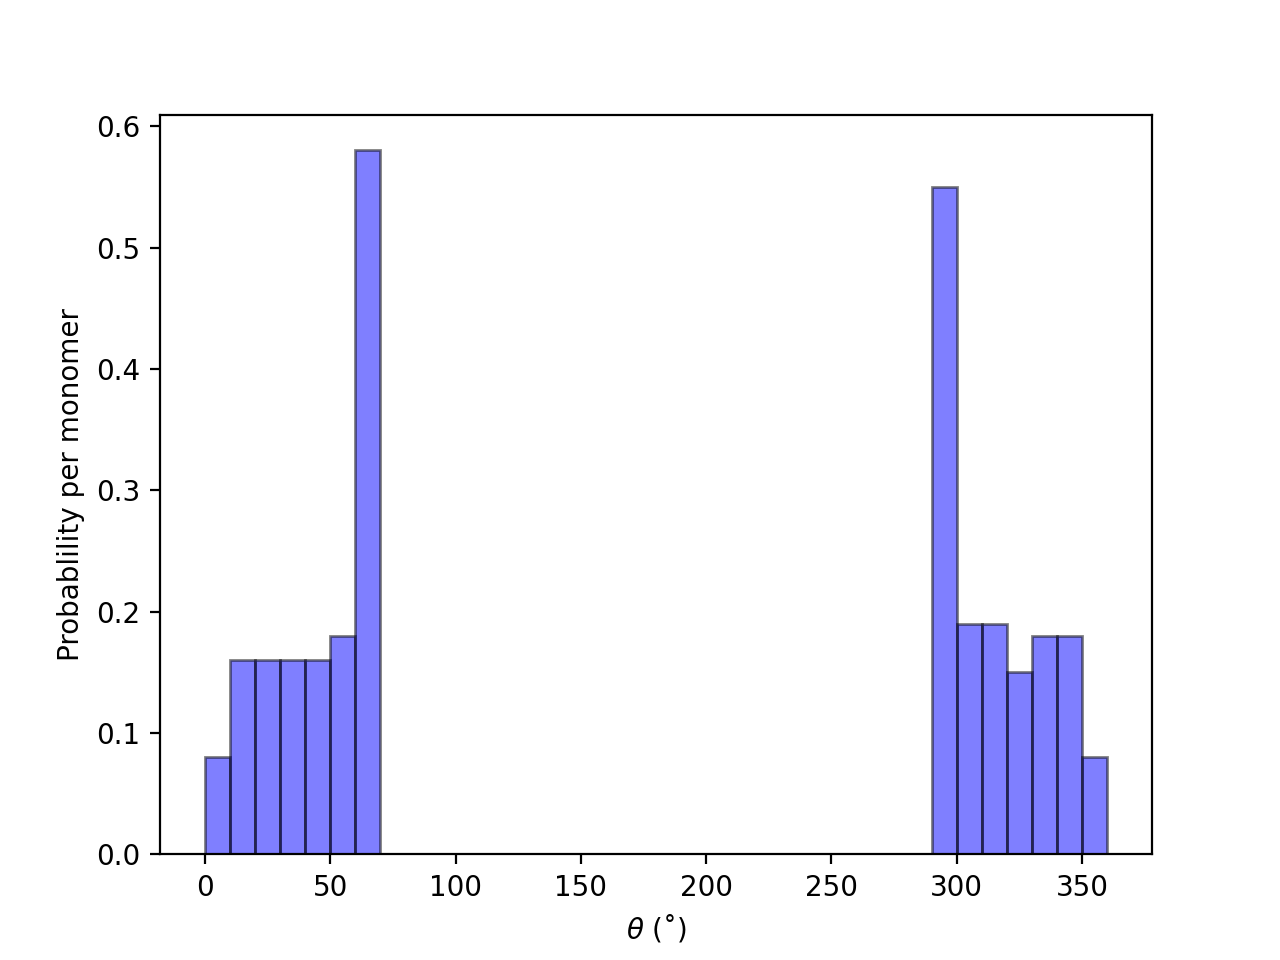

{'r': 2.25e-09,
 'd': 3.5e-10,
 'step': 10,
 'm_atom': 8.9,
 'Bext': array([0, 2, 0]),
 'T': 298,
 'm_curie': 0.11903009247365273,
 'az': 90.0,
 'el': 0.0,
 'NN': 100,
 'min': 1,
 'result':       fun: -71.4062722922621
  hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
       jac: array([0., 0.])
   message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
      nfev: 3
       nit: 0
      njev: 1
    status: 0
   success: True
         x: array([90.,  0.])}

In [18]:
Bext = np.array([0,2,0]) # Applied Field
NN = 100 
param = {
    'r':r,
    'd':d,
    'step':step,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':90.0,
    'el':0.0,
    'NN':NN,
    'min':1,
}
    
U,Bt,p = macro_calc(param)
Bdip = (Bt - Bext)

B_az,B_el,Bm = cart2sph(Bdip[:,0], Bdip[:,1],Bdip[:,2])
B_az = np.rad2deg(B_az) % 360
B_el = np.rad2deg(B_el) % 360


num_bins = 36
weights = np.ones_like(Bm)/NN

SAV = 0

plt.close('all')
fig = plt.figure()
plt.hist(Bm*1e3,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$|B|$ (mT)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_Bm_y_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')

fig = plt.figure()
plt.hist(B_az,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\phi$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_azimuthal_y_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')


fig = plt.figure()
plt.hist(B_el,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\theta$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()

filenm = 'dist_elevation_y_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')
param

### Bz

<IPython.core.display.Javascript object>


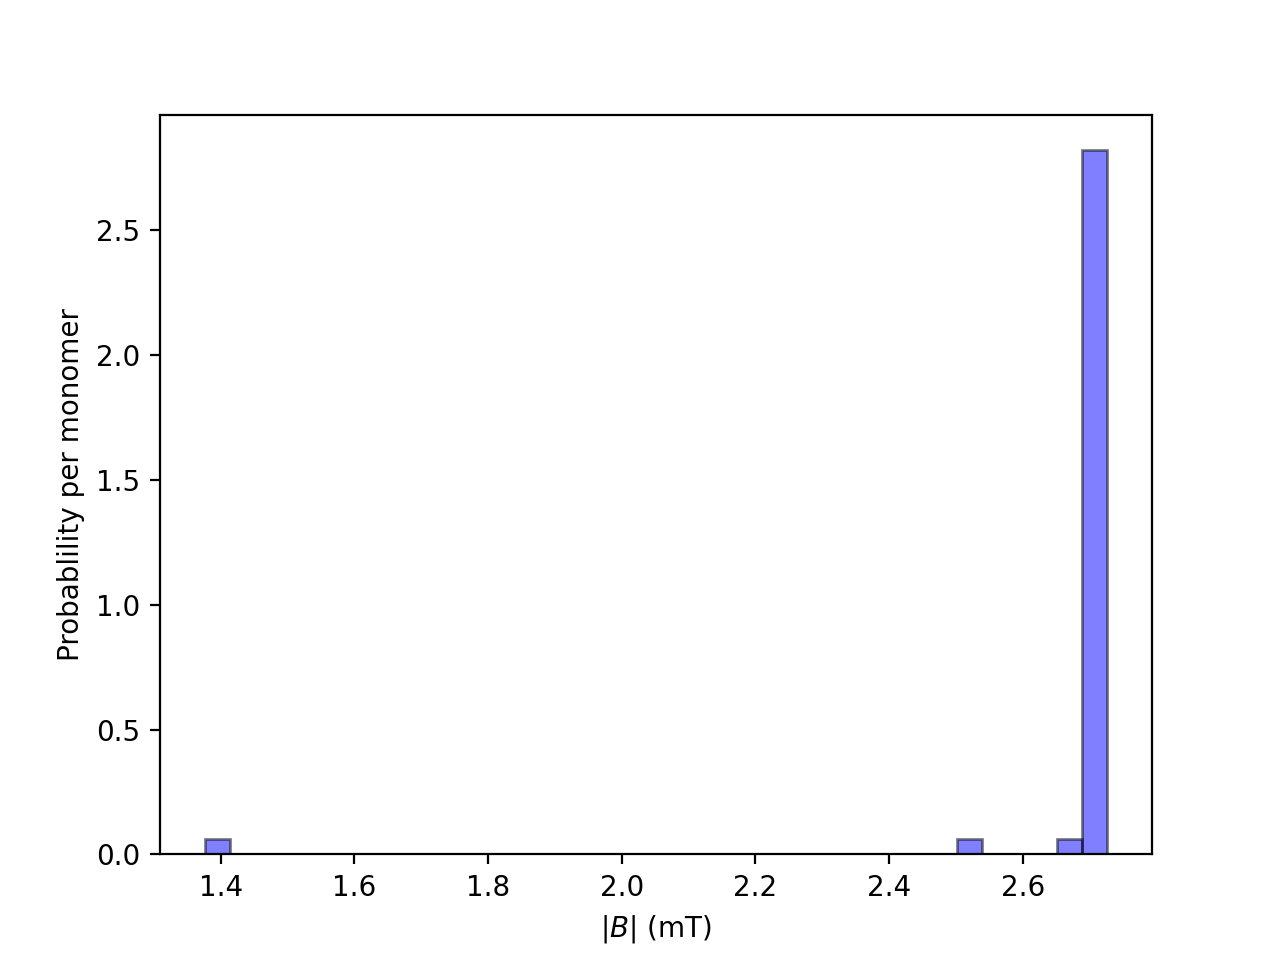

<IPython.core.display.Javascript object>


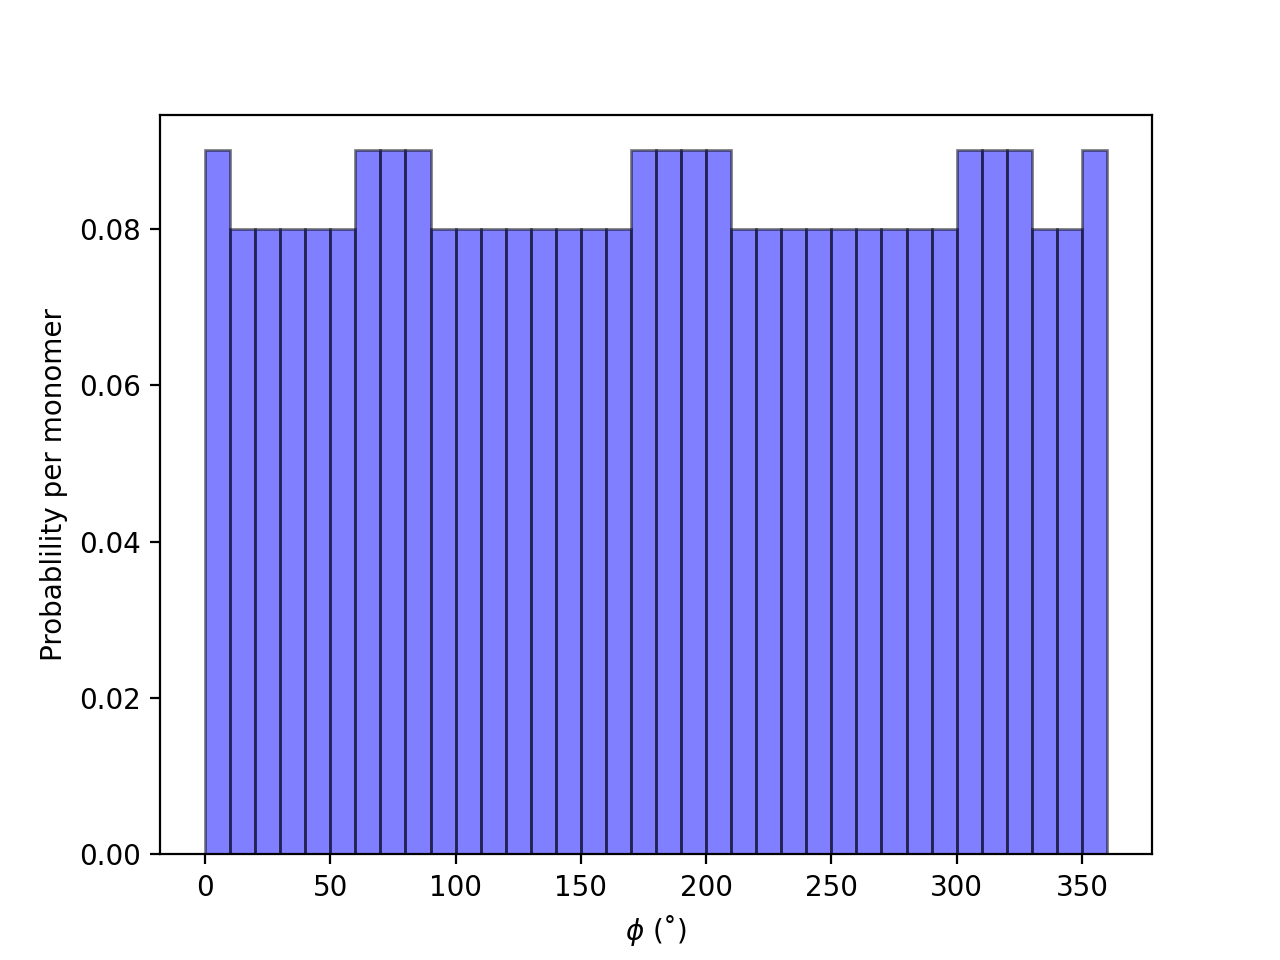

<IPython.core.display.Javascript object>


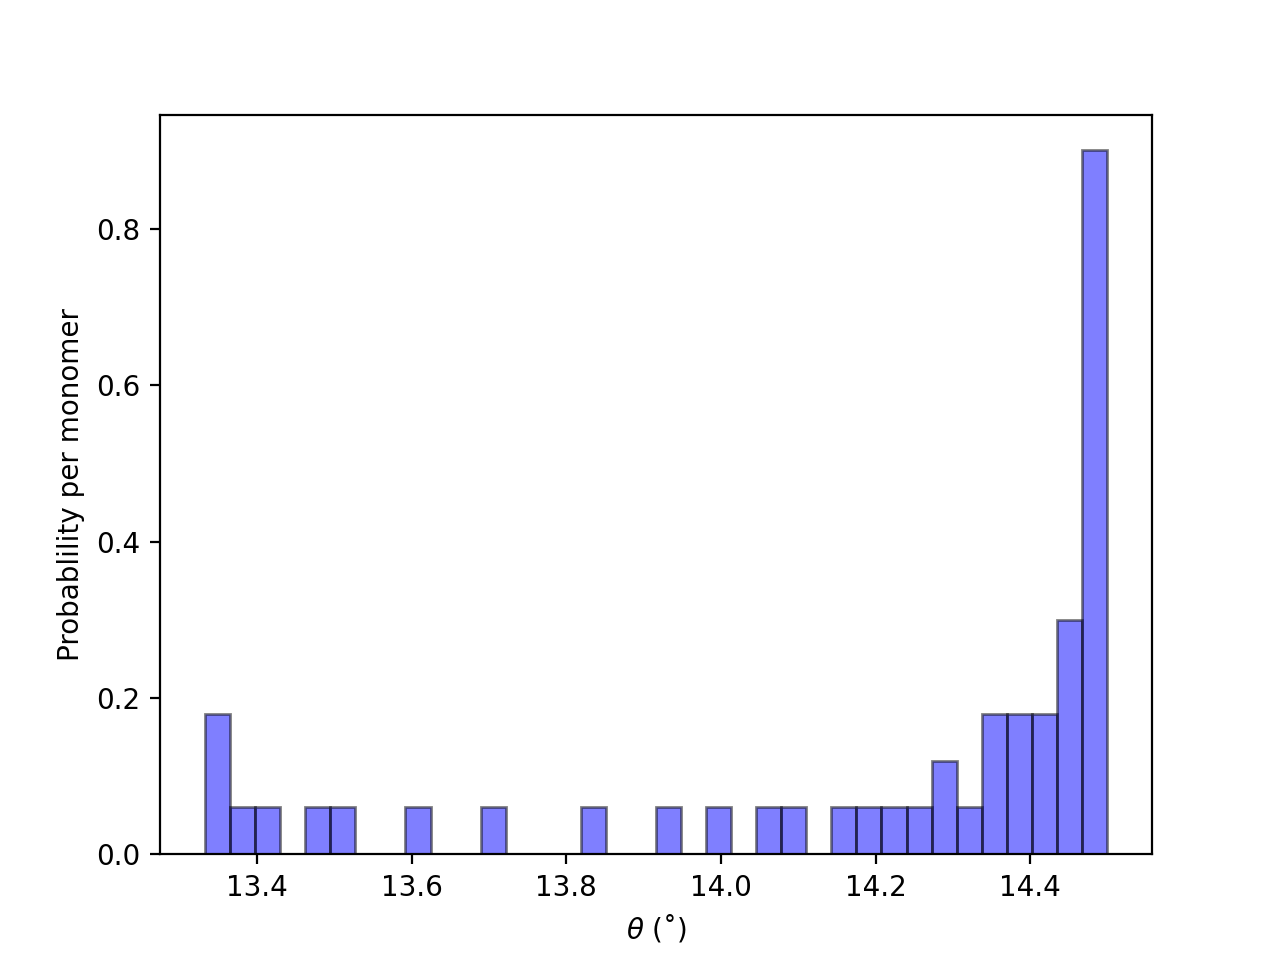

{'r': 2.25e-09,
 'd': 3.5e-10,
 'step': 10,
 'm_atom': 8.9,
 'Bext': array([0, 0, 2]),
 'T': 298,
 'm_curie': 0.11903009247365273,
 'az': 90.0,
 'el': 90.0,
 'NN': 100,
 'min': 1,
 'result':       fun: -71.44162186805072
  hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
       jac: array([0., 0.])
   message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
      nfev: 3
       nit: 0
      njev: 1
    status: 0
   success: True
         x: array([90., 90.])}

In [19]:
Bext = np.array([0,0,2]) # Applied Field
NN = 100 
param = {
    'r':r,
    'd':d,
    'step':step,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':90.0,
    'el':90.0,
    'NN':NN,
    'min':1,
}
    
U,Bt,p = macro_calc(param)
Bdip = (Bt - Bext)

B_az,B_el,Bm = cart2sph(Bdip[:,0], Bdip[:,1],Bdip[:,2])
B_az = np.rad2deg(B_az) % 360
B_el = np.rad2deg(B_el) % 360


num_bins = 36
weights = np.ones_like(Bm)/NN

SAV = 0

plt.close('all')
fig = plt.figure()
plt.hist(Bm*1e3,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$|B|$ (mT)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_Bm_z_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')

fig = plt.figure()
plt.hist(B_az,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\phi$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_azimuthal_z_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')


fig = plt.figure()
plt.hist(B_el,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\theta$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()

filenm = 'dist_elevation_z_100_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')
param

# Angular Dependence

<IPython.core.display.Javascript object>


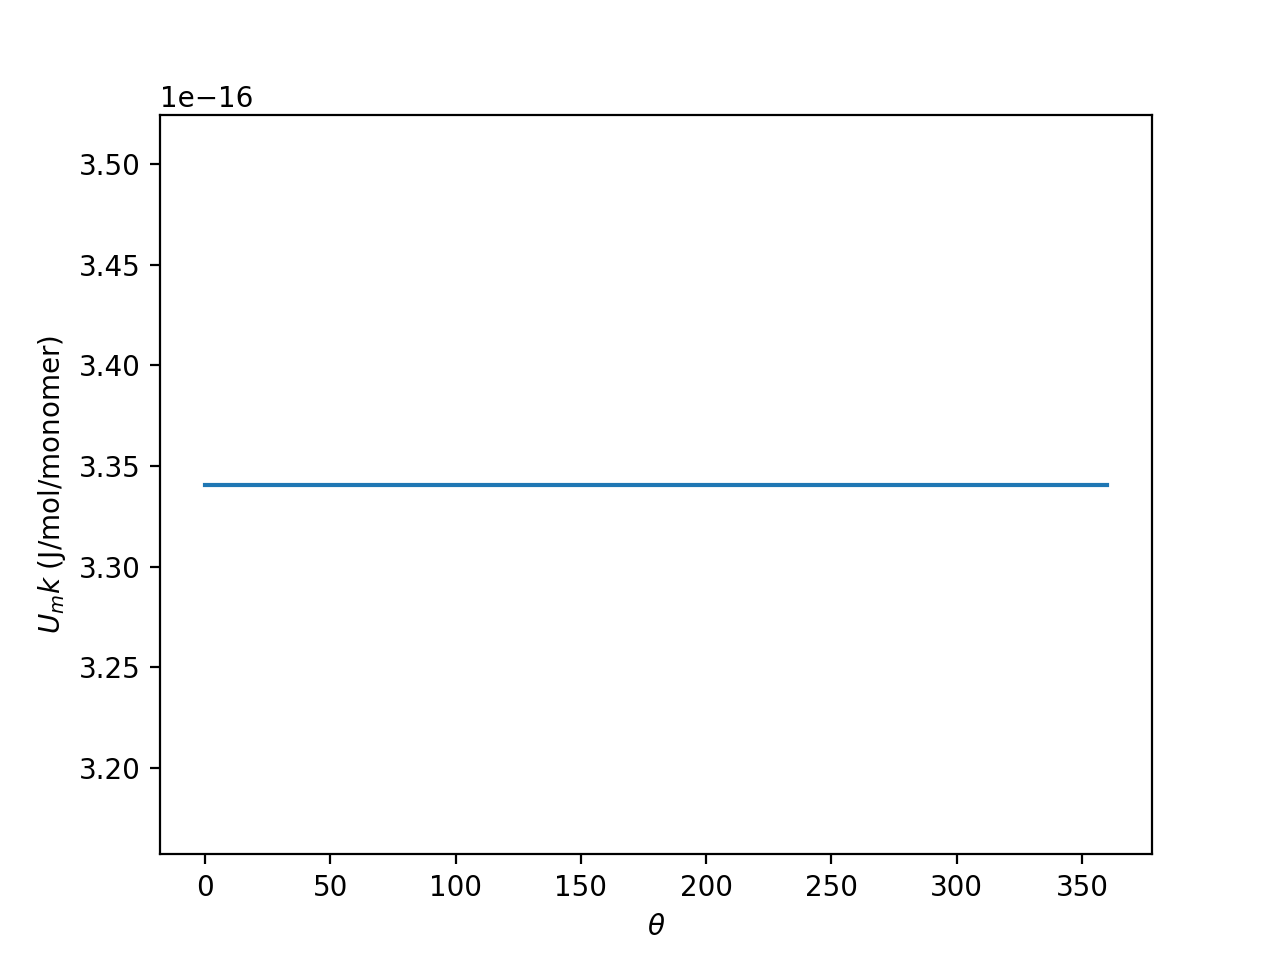

In [20]:
NN = 20 

az = 90.0
el = 90.0
NP = 37
el_arr = np.linspace(0,360,NP)
Ures_el = np.zeros_like(el_arr)

# k = 0
for k in range(NP):
    el = el_arr[0]

    Bx,By,Bz = sph2cart(2, np.deg2rad(az), np.deg2rad(el))
    Bext = np.array([Bx,By,Bz]) # Applied Field
    param = {
        'r':r,
        'd':d,
        'step':step,
        'm_atom':m_atom,
        'Bext':Bext,
        'T':T,
        'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
        'az':az,
        'el':el,
        'NN':NN,
        'min':1,
    }

    U,Bt,p = macro_calc(param)
    Ures_el[k] = U*Na/NN
Ures_el

fig, ax = plt.subplots()
plt.plot(el_arr,(Ures_el-np.mean(Ures_el))/np.mean(Ures_el))


# plt.xlim(Bx,1.0)
# plt.ylim(-50,250)

plt.xlabel(r'$\theta$')
plt.ylabel(r'$U_mk$ (J/mol/monomer)')
# plt.legend(loc='best')
plt.show(block=False)

In [22]:
NP = (36*2) + 1 # No. of sample points
NPJ = NP*1j

az_arr, el_arr = np.mgrid[0:360:NPJ, 0:360:NPJ]
Ures = np.zeros_like(az_arr)

for j in range(NP):
    for k in range(NP):
        az = az_arr[j,k]
        el = el_arr[j,k]
#         print(i,j)
        Bx,By,Bz = sph2cart(2, np.deg2rad(az), np.deg2rad(el))
        Bext = np.array([Bx,By,Bz]) # Applied Field
        param = {
            'r':r,
            'd':d,
            'step':step,
            'm_atom':m_atom,
            'Bext':Bext,
            'T':T,
            'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
            'az':az,
            'el':el,
            'NN':NN,
            'min':1,
        }

        U,Bt,p = macro_calc(param)
        Ures[j,k] = U*Na/NN

<IPython.core.display.Javascript object>


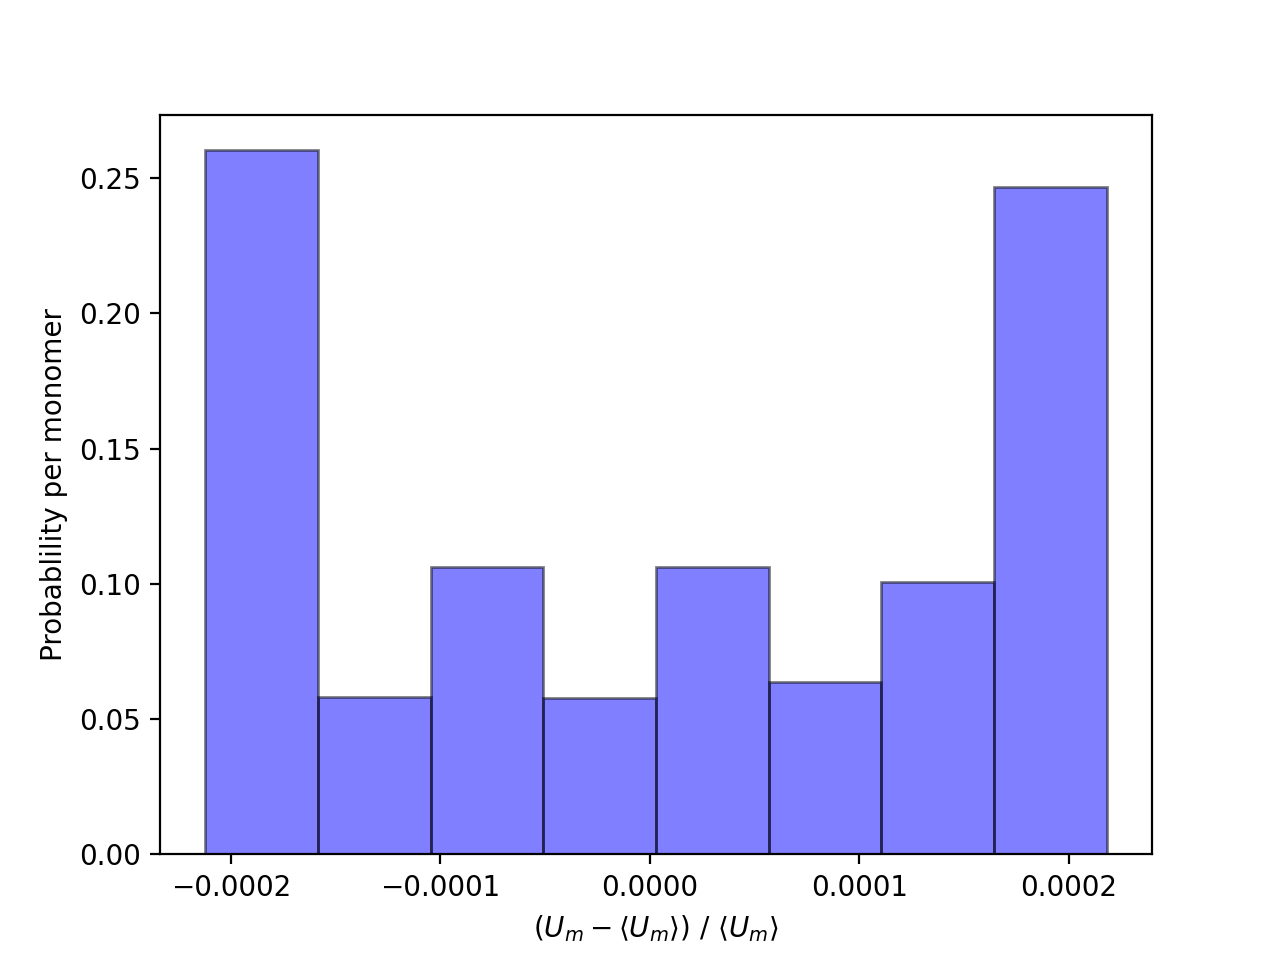

Um, mean: -3.99, std: 6.11e-04 J/mol/mono, N = 5329


In [24]:
num_bins = 8
# weights = np.ones_like(Bm)/NN
weights = np.ones_like(Ures.ravel())/len(Ures.ravel())
SAV = 0
fig = plt.figure()
plt.hist((Ures.ravel()-np.mean(Ures))/np.mean(Ures), bins = num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\left(U_m - \left<U_m\right>\right)$ $/$ $\left<U_m\right>$')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_Um_angular_20_macro'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')
param

print('Um, mean: {0:0.2f}, std: {1:0.2e} J/mol/mono, N = {2:0d}'.format(
                                np.mean(Ures), np.std(Ures), len(Ures.ravel())))